# 1. Loading Google Drive Data on Colab Notebook

In [2]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the folder path
folder_path = '/content/drive/My Drive/ImageClassification'

# Check if the folder exists
if os.path.exists(folder_path):
    # Navigate to the folder
    os.chdir(folder_path)

    # List files in the folder
    files = os.listdir(folder_path)
    print(files)
else:
    print(f"The folder '{folder_path}' does not exist.")

Mounted at /content/drive
['154006829.jpg', '.gitignore', '8iAb9k4aT.jpg', 'JAVED.jpg', 'imageclassifier', 'imageclass', 'models', 'data', 'logs', 'ImageAnalyzer.ipynb']


In [1]:
import tensorflow as tf
import os

# 2. Refining Image Data

In [3]:
import cv2
import imghdr

In [4]:
data_dir = 'data'
os.listdir(data_dir)

['happy', 'sad']

In [5]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Loading Data

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
batch = data_iterator.next()

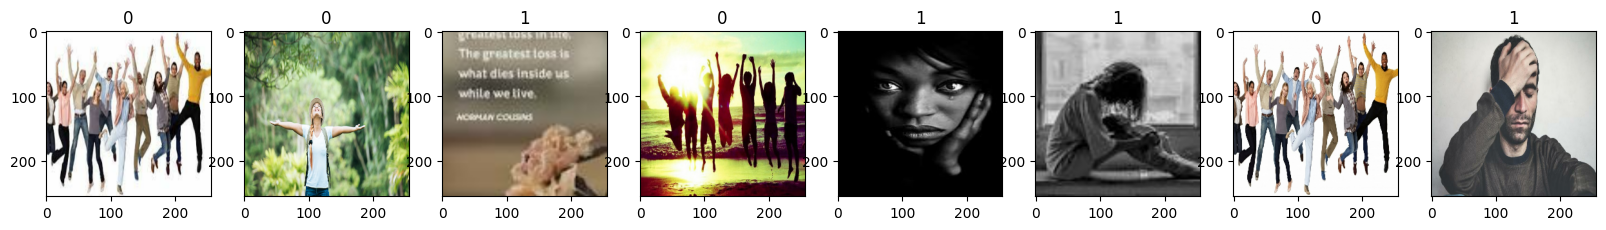

In [11]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [12]:
data = data.map(lambda x,y: (x/255, y))

In [13]:
data.as_numpy_iterator().next()

(array([[[[7.08272040e-01, 5.72242618e-01, 6.81985319e-02],
          [5.84803939e-01, 4.29718137e-01, 0.00000000e+00],
          [5.76409340e-01, 3.95404398e-01, 0.00000000e+00],
          ...,
          [4.77328420e-01, 3.78186285e-01, 1.11090690e-01],
          [5.02879918e-01, 3.87499988e-01, 2.80637257e-02],
          [5.95710814e-01, 4.73468125e-01, 2.73284316e-02]],
 
         [[7.14028537e-01, 5.73305368e-01, 7.28922561e-02],
          [6.03180289e-01, 4.46633250e-01, 6.57564029e-03],
          [5.98283827e-01, 4.14444983e-01, 1.51881799e-02],
          ...,
          [4.48369056e-01, 3.50444585e-01, 8.67807418e-02],
          [4.79477704e-01, 3.66156846e-01, 1.79235116e-02],
          [5.77732921e-01, 4.57394361e-01, 1.86273307e-02]],
 
         [[7.23176599e-01, 5.74994266e-01, 8.03514645e-02],
          [6.32383823e-01, 4.73514587e-01, 1.70255769e-02],
          [6.33046567e-01, 4.44704056e-01, 3.93250696e-02],
          ...,
          [4.02347088e-01, 3.06357831e-01, 4.8147

# 5. Split Data

In [14]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [15]:
train_size

7

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [17]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [23]:
logdir='logs'

In [24]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [25]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 28s 3s/step - loss: 0.8088 - accuracy: 0.5134 - val_loss: 0.6763 - val_accuracy: 0.6094
Epoch 2/20
7/7 [==============================] - 20s 2s/step - loss: 0.6737 - accuracy: 0.5357 - val_loss: 0.6567 - val_accuracy: 0.5312
Epoch 3/20
7/7 [==============================] - 21s 2s/step - loss: 0.6380 - accuracy: 0.6384 - val_loss: 0.6973 - val_accuracy: 0.4531
Epoch 4/20
7/7 [==============================] - 19s 2s/step - loss: 0.6124 - accuracy: 0.7321 - val_loss: 0.5588 - val_accuracy: 0.8125
Epoch 5/20
7/7 [==============================] - 27s 3s/step - loss: 0.5227 - accuracy: 0.7723 - val_loss: 0.4417 - val_accuracy: 0.7969
Epoch 6/20
7/7 [==============================] - 20s 2s/step - loss: 0.4571 - accuracy: 0.7857 - val_loss: 0.5473 - val_accuracy: 0.7344
Epoch 7/20
7/7 [==============================] - 20s 2s/step - loss: 0.4048 - accuracy: 0.8080 - val_loss: 0.3988 - val_accuracy: 0.8125
Epoch 8/20
7/7 [==================

# 8. Plot Performance

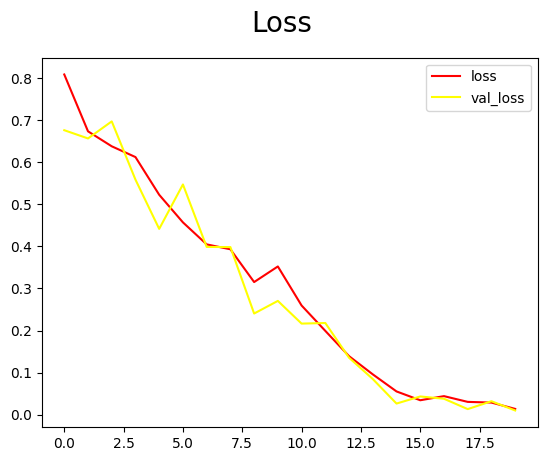

In [26]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'], color='yellow', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.show()

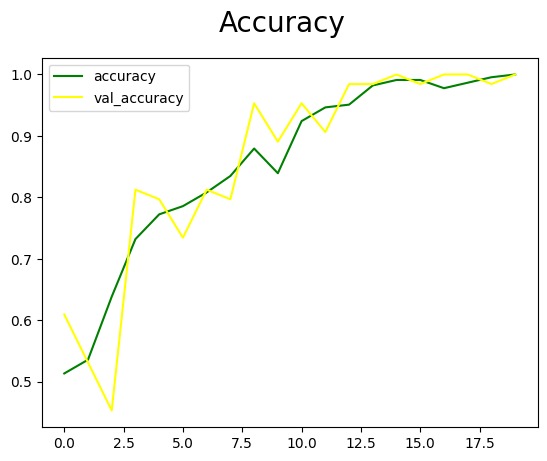

In [27]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='green', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='yellow', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [28]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [29]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [30]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 377ms/step


In [31]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [32]:
import cv2

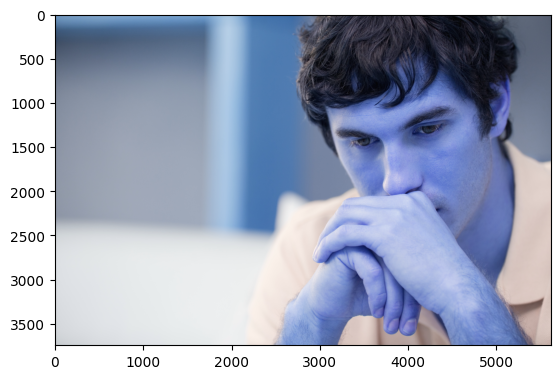

In [43]:
img = cv2.imread('8iAb9k4aT.jpg')
plt.imshow(img)
plt.show()

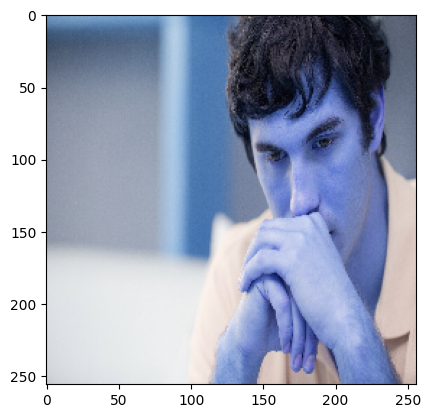

In [44]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [45]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 40ms/step


In [46]:
yhat

array([[0.99822634]], dtype=float32)

In [47]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 11. Save the Model

In [48]:
from tensorflow.keras.models import load_model

In [49]:
model.save(os.path.join('/content/drive/My Drive/ImageClassification/models','Imageclassify.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [50]:
new_model = load_model('/content/drive/My Drive/ImageClassification/models/Imageclassify.h5')

In [51]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 108ms/step


array([[0.99822634]], dtype=float32)